<h1 align = center> Proceso de EDA<sub>/EDA process</h1>

<h3 align=left> Instalacion de librerias<sub>/Library installation</sub> </h3>

In [ ]:
%pip install -r requirements.txt

<h3 align=left> Importacion de librerias<sub>/Library Importing</sub> </h3>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

<h3 align=left> Rutas /<sub> Paths</sub> </h3>

In [31]:
steam = pd.read_parquet('data_steam.parquet')
steam

,id,user_id,item_id,title,genre,developer,release_year,price,recommend,year,sentiment_analysis,playtime_forever
0,7656119797098247922200,76561197970982479,22200,Zeno Clash,Action,ACE Team,2009,9.99,1,2011,2,271
1,765611979709824791250,76561197970982479,1250,Killing Floor,Action,Tripwire Interactive,2009,19.99,1,2011,2,10006
2,js41637227300,js41637,227300,Euro Truck Simulator 2,Indie,SCS Software,2013,19.99,1,2013,2,551
3,js41637239030,js41637,239030,"Papers, Please",Adventure,3909,2013,9.99,1,2013,2,349
4,evcentric107200,evcentric,107200,Space Pirates and Zombies,Action,MinMax Games Ltd.,2011,9.99,1,2014,2,3225
...,...,...,...,...,...,...,...,...,...,...,...,...
32600,76561198239215706730,76561198239215706,730,Counter-Strike: Global Offensive,Action,Valve,2012,14.99,1,2015,2,4659
32601,wayfeng730,wayfeng,730,Counter-Strike: Global Offensive,Action,Valve,2012,14.99,1,2015,1,42740
32602,76561198251004808253980,76561198251004808,253980,Enclave,RPG,Starbreeze,2003,4.99,1,2015,2,1098
32603,72947282842730,72947282842,730,Counter-Strike: Global Offensive,Action,Valve,2012,14.99,1,2015,0,33


In [32]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32605 entries, 0 to 32604
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  32605 non-null  object 
 1   user_id             32605 non-null  object 
 2   item_id             32605 non-null  object 
 3   title               32605 non-null  object 
 4   genre               32605 non-null  object 
 5   developer           32605 non-null  object 
 6   release_year        32605 non-null  int32  
 7   price               32605 non-null  float64
 8   recommend           32605 non-null  int32  
 9   year                32605 non-null  int32  
 10  sentiment_analysis  32605 non-null  int64  
 11  playtime_forever    32605 non-null  int32  
dtypes: float64(1), int32(4), int64(1), object(6)
memory usage: 2.5+ MB


Descripción de valores estadísticos del dataframe

In [37]:
steam.describe(include=[np.number])

,release_year,price,recommend,year,sentiment_analysis,playtime_forever
count,32605.000000,32605.000000,32605.000000,32605.000000,32605.000000,32605.000000
mean,2012.106548,14.739994,0.911639,2014.200920,1.486060,9604.365557
std,3.123417,13.752961,0.283823,0.820446,0.753777,23130.294467
min,1989.000000,0.000000,0.000000,2010.000000,0.000000,0.000000
25%,2011.000000,6.990000,1.000000,2014.000000,1.000000,428.000000
50%,2013.000000,14.990000,1.000000,2014.000000,2.000000,1604.000000
75%,2014.000000,19.990000,1.000000,2015.000000,2.000000,6981.000000
max,2017.000000,771.710000,1.000000,2015.000000,2.000000,642773.000000


Moda

In [49]:
steam[['release_year','price','recommend','year','sentiment_analysis','playtime_forever']].mode()

,release_year,price,recommend,year,sentiment_analysis,playtime_forever
0,2012,19.99,1,2014,2,7


Descripción de valores categoricas del dataframe

In [39]:
steam.describe(include=object)

,id,user_id,item_id,title,genre,developer
count,32605,32605,32605,32605,32605,32605
unique,31194,16221,2074,2074,16,1529
top,blablabla174730,76561198064484479,730,Counter-Strike: Global Offensive,Action,Valve
freq,9,36,2817,2817,23796,4454


Visualizacion de conteos

<function matplotlib.pyplot.show(close=None, block=None)>

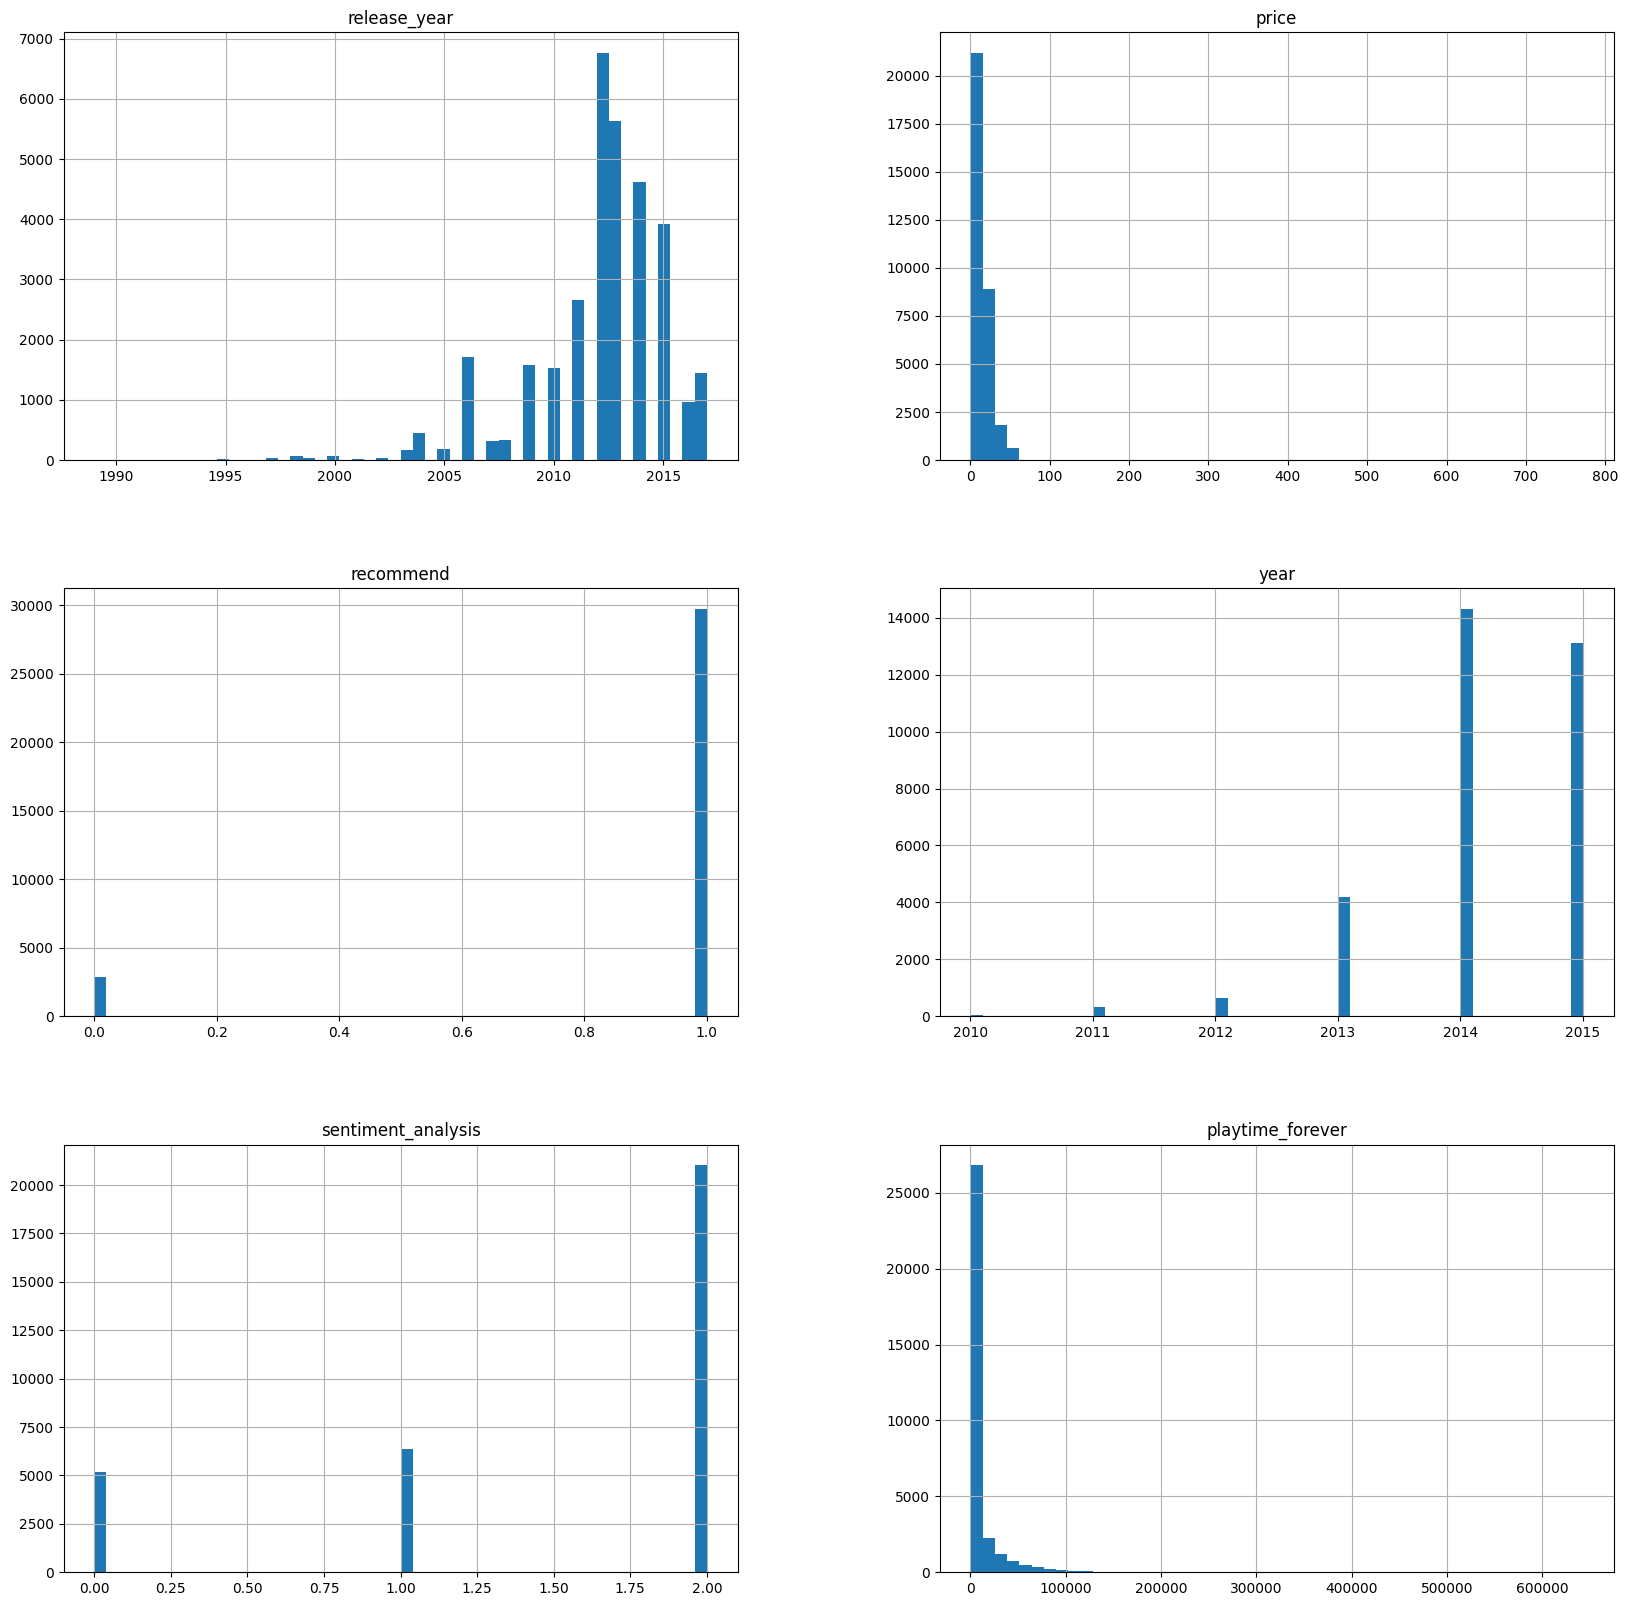

In [35]:
steam.hist(bins=50,figsize=(20,20))
plt.show

In [53]:
#Eliminaremos los outliers
sdata_release_year = steam['release_year']
data_price = steam['price']
data_playtime_forever = steam['playtime_forever']

Cuartiles y Rango Interquartil

In [66]:
steam[['release_year','price','recommend','year','sentiment_analysis','playtime_forever']].quantile([0.25, 0.5, 0.75]).rename_axis('Quartile')

,release_year,price,recommend,year,sentiment_analysis,playtime_forever
Quartile,,,,,,
0.25,2011.0,6.99,1.0,2014.0,1.0,428.0
0.50,2013.0,14.99,1.0,2014.0,2.0,1604.0
0.75,2014.0,19.99,1.0,2015.0,2.0,6981.0


In [96]:
iqr_steam = steam.describe(percentiles=[.25, .75])
q1 = iqr_steam.loc['25%']
q3 = iqr_steam.loc['75%']
diferencia_iqr_steam = q3 - q1
iqr = diferencia_iqr_steam.T
iqr = pd.DataFrame(iqr)
iqr_df =iqr.T.rename_axis('Interquartile')
iqr_df.index = ['0.75 - 0.25']
iqr_df

,release_year,price,recommend,year,sentiment_analysis,playtime_forever
0.75 - 0.25,3.0,13.0,0.0,1.0,1.0,6553.0


Definición de limites para las columnas

In [95]:
lower_bound = iqr_steam.loc['25%'] - 1.5 * iqr.T
lower_bound

upper_bound = iqr_steam.loc['75%'] + 1.5 * iqr.T
upper_bound

df_bounds = pd.concat([lower_bound,upper_bound], axis =0)
df_bounds.index =['lower_bound','upper_bound']
df_bounds


,release_year,price,recommend,year,sentiment_analysis,playtime_forever
lower_bound,2006.5,-12.51,1.0,2012.5,-0.5,-9401.5
upper_bound,2018.5,39.49,1.0,2016.5,3.5,16810.5


In [ ]:
filtered_data_release_date = steam[
    (steam['release_year'] >= lower_bound.loc[0, 'release_year']) &
    (steam['release_year'] <= upper_bound.loc[0, 'release_year'])
]

filtered_data_release_date

Eliminación de los outliers

In [115]:
# Filtrar los outliers para Release_date
filtered_data_release_date = steam[
    (steam['release_year'] >= lower_bound.loc[0, 'release_year']) &
    (steam['release_year'] <= upper_bound.loc[0, 'release_year'])]

# Filtrar los outliers para Price
filtered_data_price = steam[(steam['price'] >= lower_bound.loc[0, 'price']) & (steam['price'] <= upper_bound.loc[0, 'price'])]

# Filtrar los outliers para Playtime_forever
filtered_data_playtime_forever = steam[(steam['playtime_forever'] >= lower_bound.loc[0, 'playtime_forever']) & (steam['playtime_forever'] <= upper_bound.loc[0, 'playtime_forever'])]

Matriz de dispersión entre las variables

C:\Users\AA\AppData\Local\Temp\ipykernel_34180\287590879.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2009.  2009.  2013.  ... 2006.5 2012.  2012. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  filtered_data_all.loc[:, 'release_year'] = np.clip(filtered_data_all['release_year'], lower_bound.loc[0, 'release_year'], upper_bound.loc[0, 'release_year'])
C:\Users\AA\AppData\Local\Temp\ipykernel_34180\287590879.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  271. 10006.   551. ...  1098.    33. 10121.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  filtered_data_all.loc[:, 'playtime_forever'] = np.clip(filtered_data_all['playtime_forever'], lower_bound.loc[0, 'playtime_forever'], upper_bound.loc[0, 'playtime_forever'])
h:\Users\AA\Documents\HenryCh

<Figure size 1200x1000 with 0 Axes>

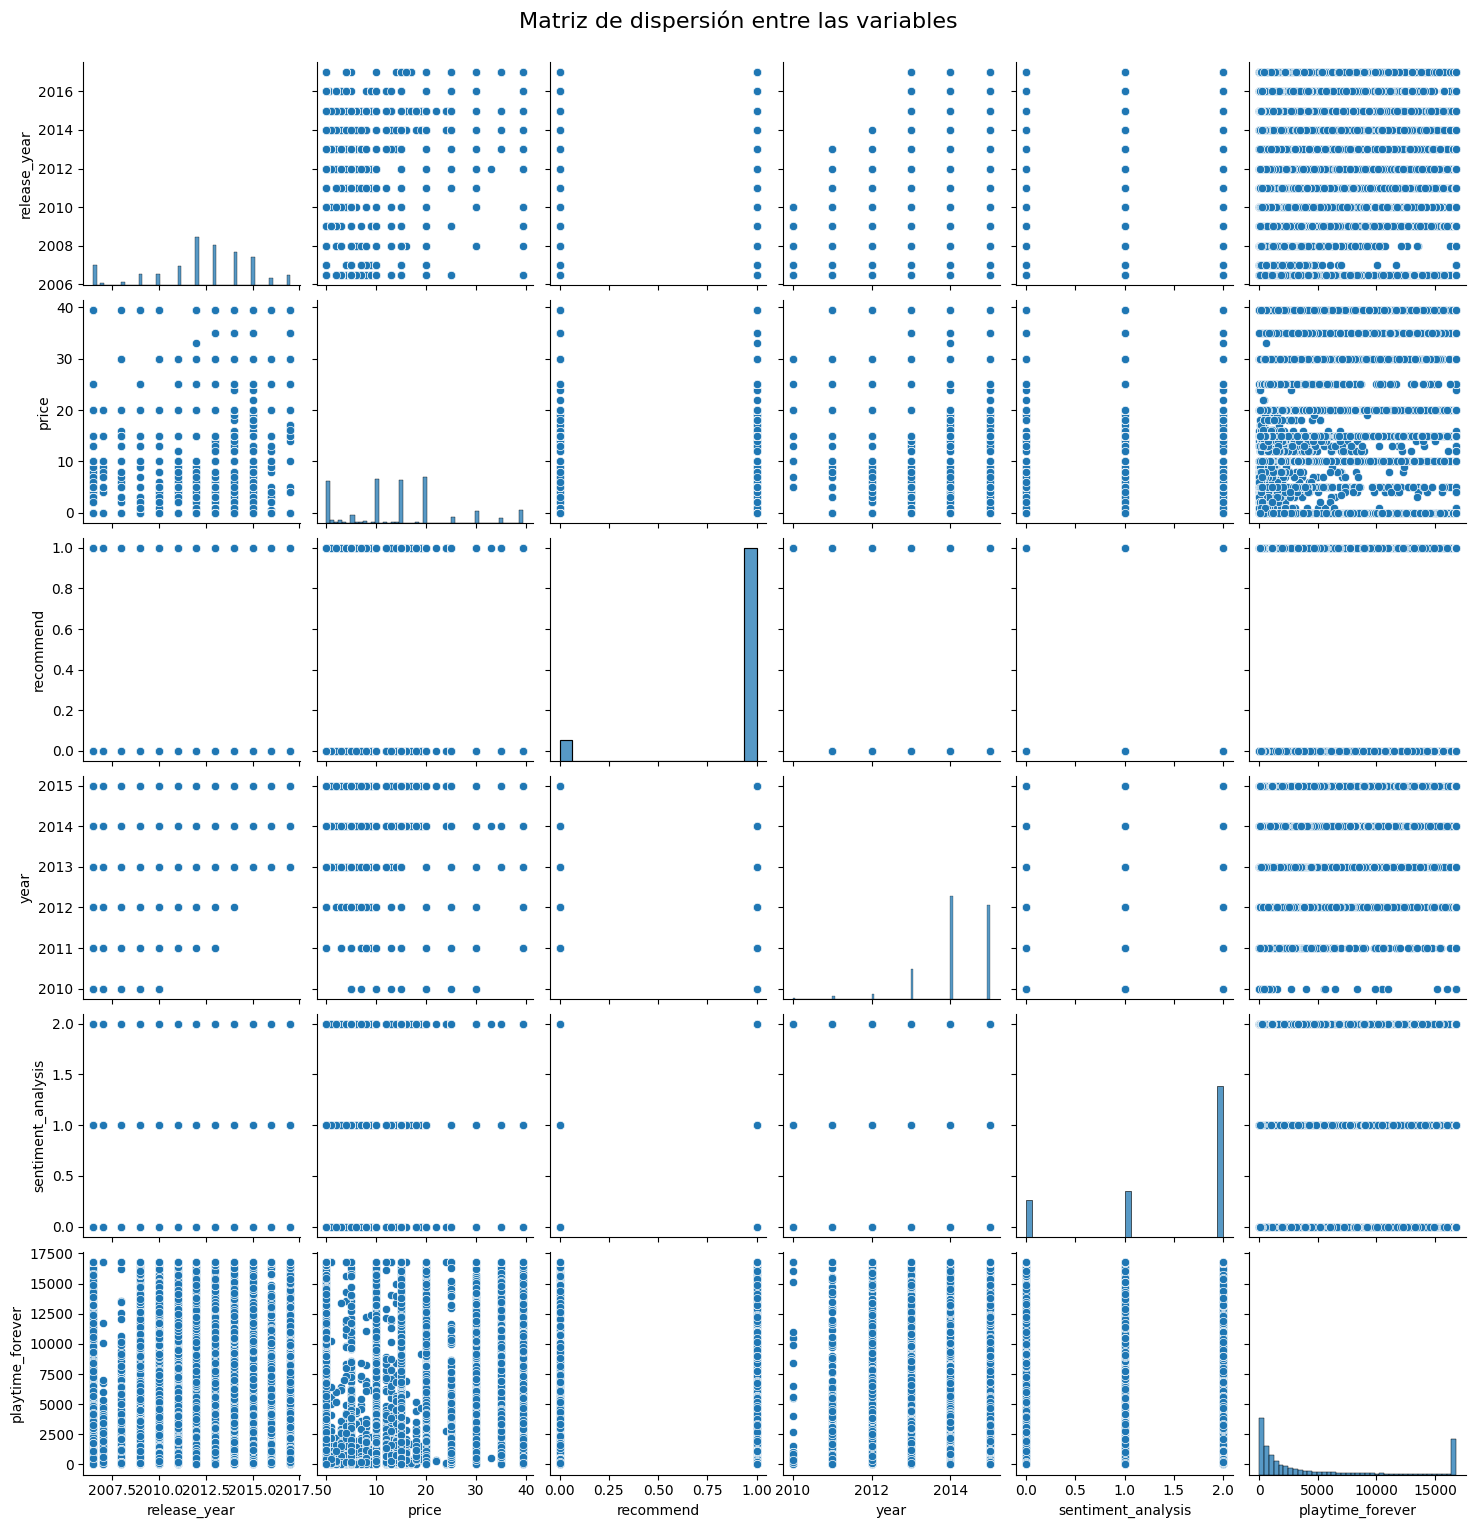

In [118]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Selecciona las columnas de interés
columns_of_interest = ['release_year', 'price', 'recommend', 'year', 'sentiment_analysis', 'playtime_forever']

# Filtra los datos para incluir solo los valores dentro de los límites intercuartiles
filtered_data_all = steam.copy()  # Crea una copia del DataFrame original
filtered_data_all.loc[:, 'release_year'] = np.clip(filtered_data_all['release_year'], lower_bound.loc[0, 'release_year'], upper_bound.loc[0, 'release_year'])
filtered_data_all.loc[:, 'price'] = np.clip(filtered_data_all['price'], lower_bound.loc[0, 'price'], upper_bound.loc[0, 'price'])
filtered_data_all.loc[:, 'playtime_forever'] = np.clip(filtered_data_all['playtime_forever'], lower_bound.loc[0, 'playtime_forever'], upper_bound.loc[0, 'playtime_forever'])

# Crea un scatter matrix con los datos filtrados
scatter_matrix_all = sns.pairplot(filtered_data_all[columns_of_interest], palette='viridis')

# Añade un título
scatter_matrix_all.fig.suptitle('Matriz de dispersión entre las variables', y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()

Boxplot basado en los preciós según géneros



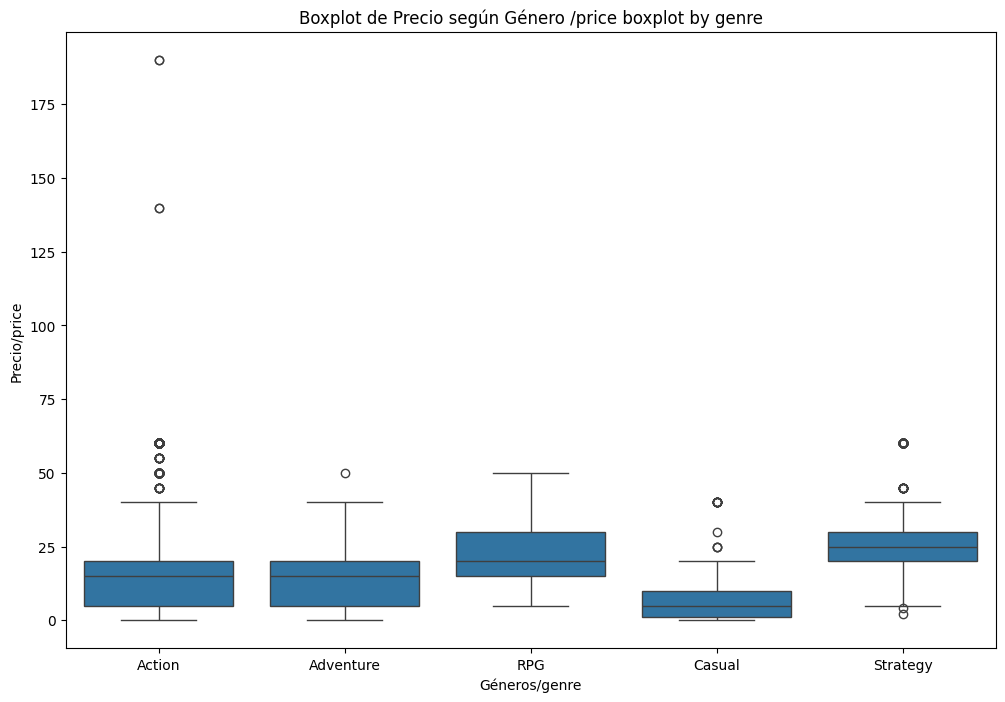

In [122]:
# Excluir el género "Indie" de los géneros más comunes
top_genres = steam['genre'].value_counts().nlargest(6).index 
top_genres = top_genres[top_genres != 'Indie']

# Filtrar los datos para incluir solo los géneros más comunes (sin "Indie")
data_top_genres = steam[steam['genre'].isin(top_genres)]

# Ajusta el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crea el boxplot
sns.boxplot(x='genre', y='price', data=data_top_genres)

# Añade etiquetas y título
plt.xlabel('Géneros/genre')
plt.ylabel('Precio/price')
plt.title('Boxplot de Precio según Género /price boxplot by genre')

# Muestra el gráfico
plt.show()


Análisis de dispersión de los datos

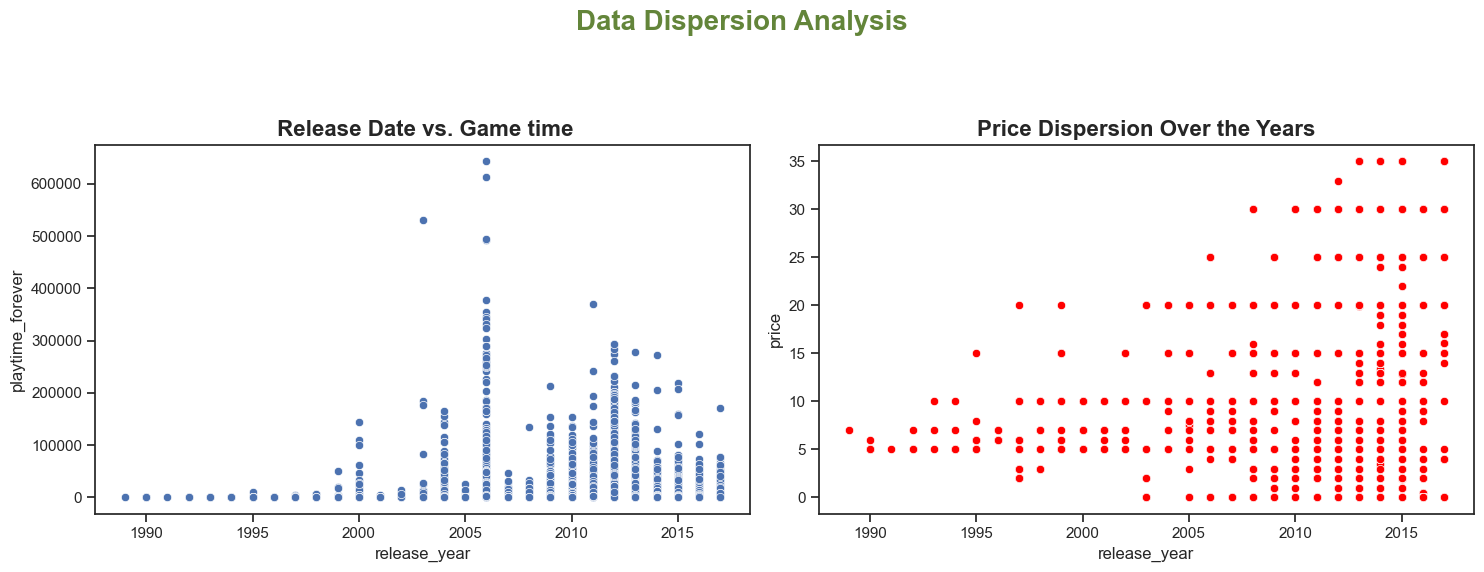

In [145]:
# Configurar subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Data Dispersion Analysis', fontsize=20, fontweight='bold', color='#63853a')  # Título principal en azul oscuro

# Gráfico 1: Dispersión de datos entre Fecha de Lanzamiento y Tiempo de Juego
sns.scatterplot(x='release_year', y='playtime_forever', data=steam, ax=axes[0])
axes[0].set_title(' Release Date vs. Game time', fontsize=16, fontweight='bold')

# Gráfico 2: Dispersión de precios de los juegos a través de los años
sns.scatterplot(x='release_year', y='price', data=filtered_data_price, color='red', ax=axes[1])
axes[1].set_title('Price Dispersion Over the Years', fontsize=16, fontweight='bold')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Mostrar el gráfico
plt.show()

Relación entre variables con el filtro de análisis de sentimiento



C:\Users\AA\AppData\Local\Temp\ipykernel_34180\4097628217.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2009.  2009.  2013.  ... 2006.5 2012.  2012. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  subset_data.loc[:, 'release_year'] = np.clip(subset_data['release_year'], lower_bound.loc[0, 'release_year'], upper_bound.loc[0, 'release_year'])
C:\Users\AA\AppData\Local\Temp\ipykernel_34180\4097628217.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  271. 10006.   551. ...  1098.    33. 10121.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  subset_data.loc[:, 'playtime_forever'] = np.clip(subset_data['playtime_forever'], lower_bound.loc[0, 'playtime_forever'], upper_bound.loc[0, 'playtime_forever'])


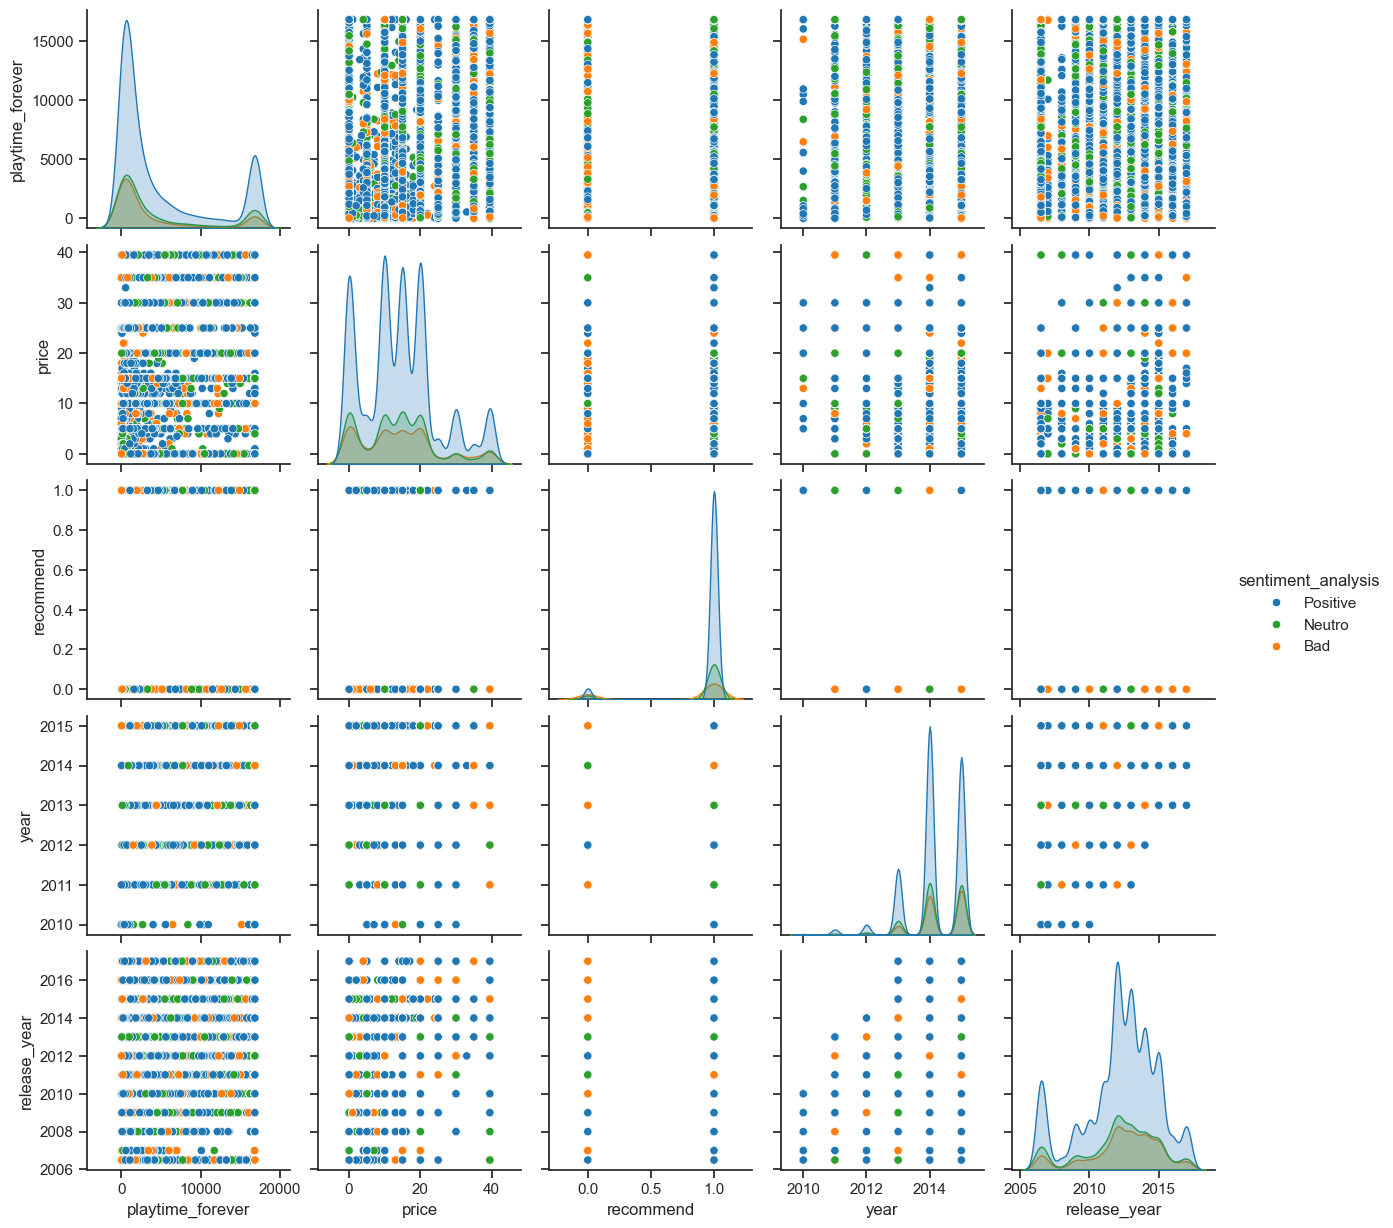

In [147]:
# Seleccionar las columnas de interés
columns_of_interest = ['sentiment_analysis', 'playtime_forever', 'price', 'recommend', 'year', 'release_year']
subset_data = steam[columns_of_interest].copy()  # Crear una copia del DataFrame original

# Reemplazar los valores atípicos en las columnas seleccionadas
subset_data.loc[:, 'release_year'] = np.clip(subset_data['release_year'], lower_bound.loc[0, 'release_year'], upper_bound.loc[0, 'release_year'])
subset_data.loc[:, 'price'] = np.clip(subset_data['price'], lower_bound.loc[0, 'price'], upper_bound.loc[0, 'price'])
subset_data.loc[:, 'playtime_forever'] = np.clip(subset_data['playtime_forever'], lower_bound.loc[0, 'playtime_forever'], upper_bound.loc[0, 'playtime_forever'])

# Reemplazar los valores numéricos por etiquetas deseadas
subset_data['sentiment_analysis'] = subset_data['sentiment_analysis'].replace({0: 'Bad', 1: 'Neutro', 2: 'Positive'})

# Configurar el estilo de seaborn
sns.set(style="ticks")

# Crear el pairplot con colores personalizados
custom_palette = {'Positive': 'tab:blue', 'Bad': 'tab:orange', 'Neutro': 'tab:green'}
sns.pairplot(subset_data, hue='sentiment_analysis', palette=custom_palette)

# Mostrar el gráfico
plt.show()

Matriz de correlación entre las variables seleccionadas



                  playtime_forever     price  recommend      year  \
playtime_forever          1.000000  0.023206   0.054459  0.026364   
price                     0.023206  1.000000  -0.018339  0.002460   
recommend                 0.054459 -0.018339   1.000000 -0.112898   
year                      0.026364  0.002460  -0.112898  1.000000   
release_year             -0.122212  0.043334  -0.075806  0.270099   

                  release_year  
playtime_forever     -0.122212  
price                 0.043334  
recommend            -0.075806  
year                  0.270099  
release_year          1.000000  


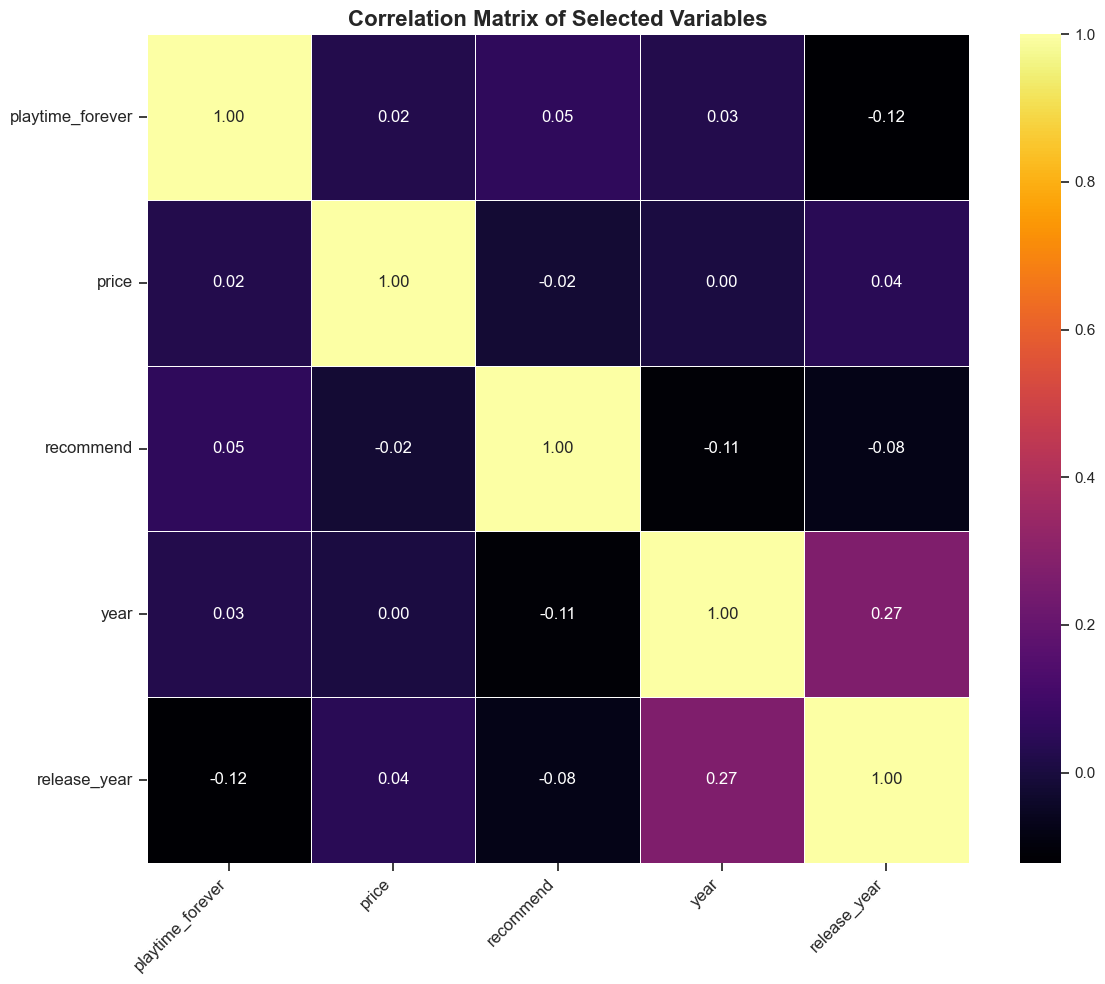

In [150]:
# Seleccionar las columnas de interés
columns_of_interest = ['playtime_forever', 'price', 'recommend', 'year', 'release_year']
subset_data = steam[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = subset_data.corr()
print(correlation_matrix)

# Ajustar el tamaño del heatmap
plt.figure(figsize=(12, 10))

# Graficar la matriz de correlación con detalles
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='inferno', linewidths=.5, cbar=True)

# Añadir un título al heatmap
plt.title("Correlation Matrix of Selected Variables", fontsize=16, weight='bold')

# Ajustar la rotación de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar el tamaño de la fuente de las etiquetas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el espacio vertical para asegurar que todas las etiquetas sean visibles
plt.tight_layout()

# Mostrar el heatmap
plt.show()

Top 5 juegos mas recomendados

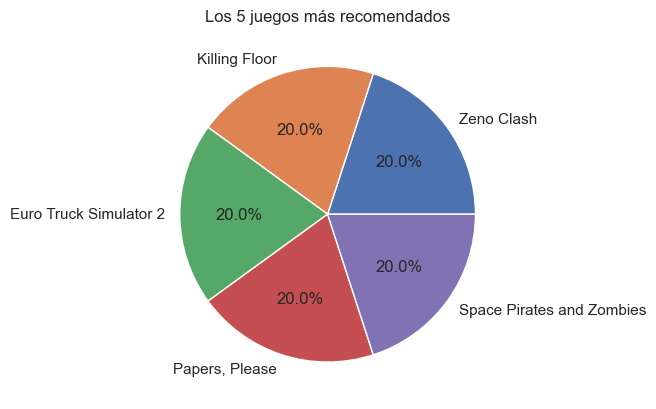

In [159]:
# Seleccionar los 5 juegos más recomendados y eliminar los duplicados
top_games = steam.drop_duplicates(subset="title").nlargest(5, "recommend")

# Crear un gráfico de torta  que muestra el nombre del juego y la cantidad de recomendaciones
plt.pie(top_games["recommend"], labels=top_games["title"], autopct="%1.1f%%")
plt.title("Los 5 juegos más recomendados")
plt.show()

Top 5 géneros más jugados



C:\Users\AA\AppData\Local\Temp\ipykernel_34180\1353934028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=data_top_genres, order=top_genres, palette=colors)


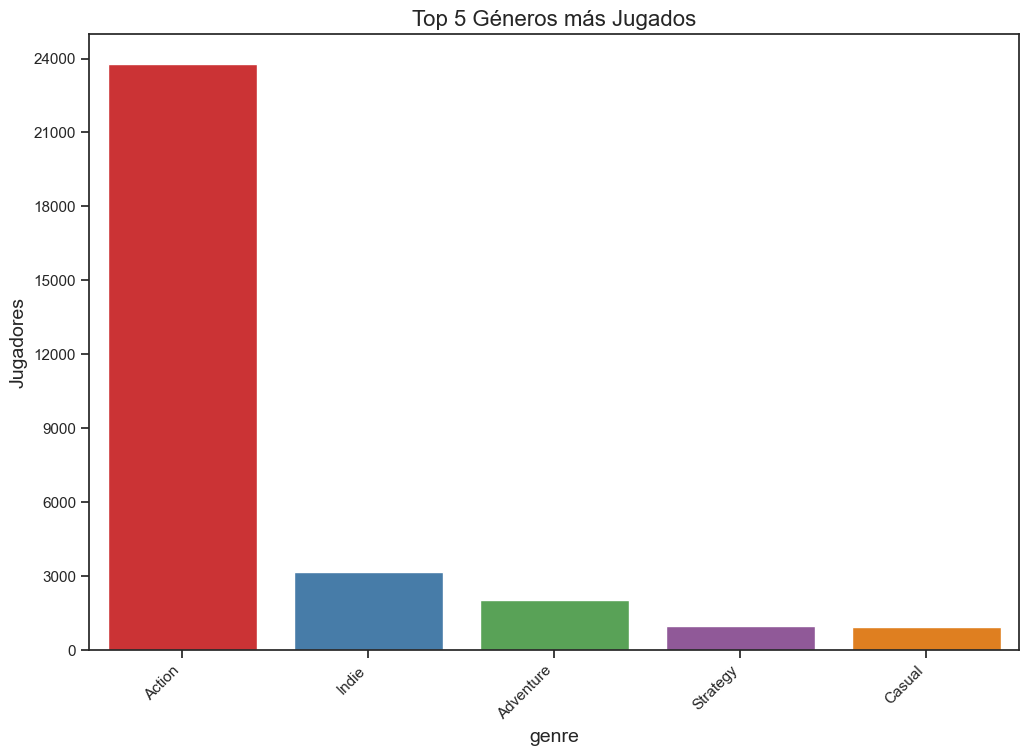

In [166]:
# Crear una figura más grande
plt.figure(figsize=(12, 8))

# Seleccionar los 5 primeros géneros
top_genres = steam['genre'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para los 5 primeros géneros
data_top_genres = steam[steam['genre'].isin(top_genres)]

# Definir colores personalizados
colors = sns.color_palette("Set1")[:5]

# Graficar el conteo con barras personalizadas
sns.countplot(x='genre', data=data_top_genres, order=top_genres, palette=colors)

# Personalizar ejes y etiquetas
plt.title('Top 5 Géneros más Jugados', fontsize=16)
plt.xlabel('genre', fontsize=14)
plt.ylabel('Jugadores', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mayor legibilidad
plt.yticks(range(0, 25001, 3000))  # División en el eje y cada 5000
# Mostrar la gráfica
plt.show()

Proporción de recomendaciones positivas y negativas



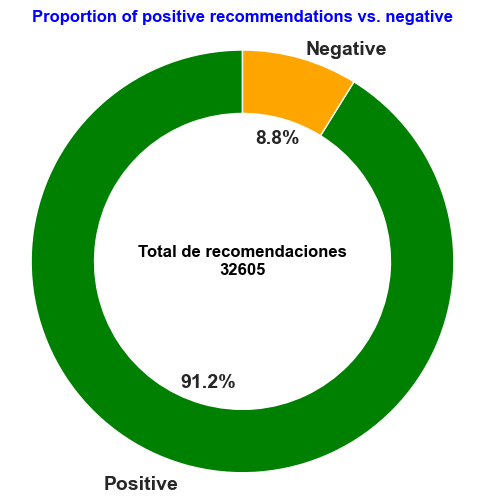

In [170]:
# Contar el número de reseñas positivas y negativas
num_positivas = (steam['recommend'] == 1).sum()
num_negativas = (steam['recommend'] == 0).sum()
total_resenas = len(steam)

# Seleccionar una paleta de colores personalizada (verde oscuro y morado oscuro)
colores = ['green', 'orange']  # Verde oscuro y morado oscuro

# Crear el gráfico
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie([num_positivas, num_negativas], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops=dict(width=0.3, edgecolor='w'), textprops=dict(size=14, weight='bold'))

# Añadir el total de reseñas en el centro
plt.text(0, 0, f'Total de recomendaciones\n{total_resenas}', ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Desplazar la etiqueta 'Negativas' hacia abajo
texts[1].set_position((0.3, 1.0))

# Ajustar el aspecto del gráfico para que sea un círculo
plt.axis('equal')

# Título del gráfico
plt.title('Proportion of positive recommendations vs. negative', fontsize=12, fontweight='bold', color='Blue')

# Mostrar el gráfico
plt.show()

Análisis de comentarios



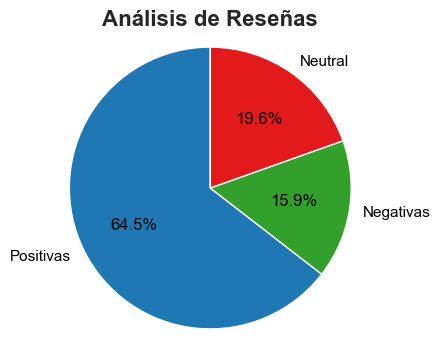

In [171]:
# Supongamos que 'Sentiment_analysis' es una columna en tus datos
plt.figure(figsize=(4, 4))

# Contar las frecuencias de cada categoría
count_positivas = (steam['sentiment_analysis'] == 2).sum()
count_negativas = (steam['sentiment_analysis'] == 0).sum()
count_neutral = (steam['sentiment_analysis'] == 1).sum()

# Etiquetas y colores intensos
labels = ['Positivas', 'Negativas', 'Neutral']
colors = ['#1f78b4', '#33a02c', '#e31a1c']

# Graficar el pastel con sombra, colores intensos y porcentajes
patches, texts, autotexts = plt.pie([count_positivas, count_negativas, count_neutral],
                                    labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Ajustar el aspecto para que el pastel sea un círculo
plt.axis('equal')

# Añadir un título
plt.title('Análisis de Reseñas', fontsize=16, weight='bold')

# Ajustar el color de fondo
plt.gca().set_facecolor('#f5f5f5')

# Modificar el color del texto
for text in texts + autotexts:
    text.set_color('black')

# Mostrar el gráfico
plt.show()